In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

sns.set()

In [2]:
from nowcasting_functions import *

In [8]:
data = pd.read_csv('data/df_SIVEP_nowcast_allStates_08-02-2021.csv')
def get_state_data(df, state):
    df_state = df.copy()
    if state == 'Brazil':
        df_state.drop(columns=['State'], inplace=True)
        columns = list(df_state.columns)
        columns.remove('Deaths')
        df_state = df_state.groupby(columns, as_index=False)['Deaths'].sum()
        return df_state
    return df_state[df_state['State'] == state]

data = get_state_data(data, 'Brazil')
data

,Date,Release,Date_index,Release_index,Deaths
0,2019-12-31,2020-07-07,-1,0,1
1,2019-12-31,2020-07-14,-1,7,1
2,2019-12-31,2020-07-21,-1,14,1
3,2019-12-31,2020-07-29,-1,22,1
4,2019-12-31,2020-08-03,-1,27,1
...,...,...,...,...,...
9446,2021-02-03,2021-02-08,399,216,621
9447,2021-02-04,2021-02-08,400,216,486
9448,2021-02-05,2021-02-08,401,216,353
9449,2021-02-06,2021-02-08,402,216,225


### Figure 2A

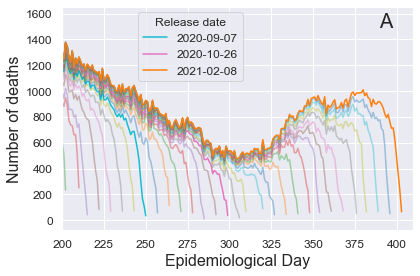

In [4]:
uniq_rel = data.Release.unique()
uniq_rel_idx = data.Release_index.unique()

# plt.figure(figsize = (8,6))
y = data.Deaths.values
sns.set_palette(sns.color_palette("tab10"))

for i in range(len(uniq_rel)):
    data_tmp = data[data['Release'] == uniq_rel[i]]
    if i in [9,int(len(uniq_rel)/2),len(uniq_rel)-1]:
        plt.plot(data_tmp.Date_index, data_tmp.Deaths, label = uniq_rel[i], alpha=1.0)
    else:
        plt.plot(data_tmp.Date_index, data_tmp.Deaths, label = '', alpha=0.4)


plt.legend(ncol = 1, fontsize=12, 
           title = 'Release date', bbox_to_anchor=(0.2, 0.64))


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylabel('Number of deaths', fontsize=16)
plt.xlabel('Epidemiological Day', fontsize=16)
plt.xlim(200,410)
plt.text(410*0.95, max(y)*0.95, 'A', size=20)

plt.tight_layout()
plt.show()


### Figure 2B

In [10]:
data_figs_delays = data[data.Date > '2020-03-12']
data_figs_delays = data_figs_delays[data_figs_delays.Date >= '2020-06-30']

In [11]:
delays_data_weekly,_ = nowcasting_prep(data_figs_delays, data_figs_delays.Date.values[-1], maxD=27)

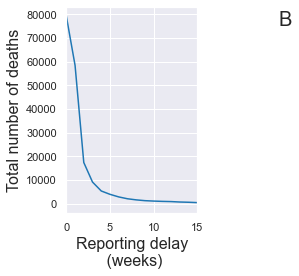

In [13]:
x = delays_data_weekly.iloc[:,:-1]
plt.figure(figsize = (3,4))
#ax = fig.add_subplot(121)
plt.plot(x.columns,x.sum(axis=0))
plt.xlabel('Reporting delay\n (weeks)', fontsize=16)
plt.ylabel('Total number of deaths', fontsize=16)

y = x.sum(axis=0)
plt.text(27*0.9, max(y)*0.95, 'B', size=20)
plt.tight_layout()
plt.xlim([0,15])
plt.show()

### Figure 2C

In [8]:
data_figs_delays = data[data.Date > '2020-06-30']
delays_data_weekly,_ = nowcasting_prep(data_figs_delays, data_figs_delays.Date.values[-1], maxD=27)

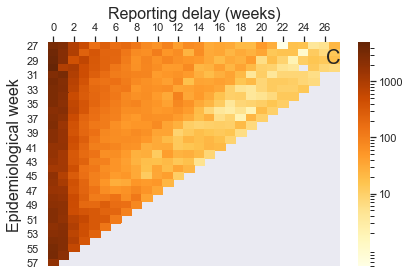

In [9]:
# plt.figure(figsize = (8,6))
x = delays_data_weekly.iloc[:,:-1]
x.iloc[0,22] = 0.01 # just because it was 0 there
x.index = x.index.astype(int) + 27

cbar_ticks = [0, 0.1, 10, 100, 1000, 10000]
ax = sns.heatmap(x, mask= x == 0, cmap="YlOrBr",
            cbar=True,
            norm=LogNorm(vmin=int(x.values.min())+0.5, vmax=int(x.values.max())))

ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.ylabel('Epidemiological week', fontsize=16)
plt.xlabel('Reporting delay (weeks)', fontsize=16)
plt.yticks(rotation=0)

cbar = ax.collections[0].colorbar
cbar_ticks = [0, 0.1, 10, 100, 1000, 10000]
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels([str(el) for el in cbar_ticks])


plt.text(28*0.95, 2.95, 'C', size=20)
plt.tight_layout()

plt.show()